In [1]:
# ARCH (Autoregressive Conditional Heteroskedasticity)

#Autoregressive conditional heteroskedasticity (ARCH) is a statistical model used to analyze volatility in time series
#in order to forecast future volatility. 


In [2]:
# ARCH modeling is used to estimate risk by providing a model of volatility that more closely resembles real markets

# ARCH concept was developed by economist Robert F. Engle III in the 1980s. 

# ARCH models are dynamic, meaning they respond to changes in the data.

# ARCH models are used by financial institutions to model asset risks over different holding periods.

In [3]:

# A statistical model is autoregressive if it predicts future values based on past values. For example, 
# an autoregressive model might seek to predict a stock's future prices based on its past performance.


# An AR(1) autoregressive process is one in which the current value is based on the immediately preceding value, 
# while an AR(2) process is one in which the current value is based on the previous two values. 
# An AR(0) process is used for white noise and has no dependence between the terms.

In [4]:

#    A great example is the Autoregressive Integrated Moving Average (ARIMA), 
#    a sophisticated autoregressive model that can take into account trends, cycles, 
#    seasonality, errors, and other non-static types of data when making forecasts.

In [5]:
# STOCK
#For example, an investor using an autoregressive model to forecast stock prices would need to assume that new buyers and 
#sellers of that stock are influenced by recent market transactions when deciding how much to offer or accept for the security.

In [6]:
# ARCH has spawned many related models that are also widely used in research and in finance, 
# including GARCH, EGARCH, STARCH, and others.

In [7]:
# Conditional heteroskedasticity identifies nonconstant volatility related to prior period's (e.g., daily) volatility

In [8]:
#Unconditional heteroskedasticity refers to general structural changes in volatility 
#that are not related to prior period volatility.

In [9]:
# GARCH or Generalized Autoregressive Conditional Heteroskedasticity

In [10]:
#Autoregressive models can be developed for univariate time series data that 
#is stationary (AR),
#has a trend (ARIMA), 
#and has a seasonal component (SARIMA).

In [11]:
# https://machinelearningmastery.com/develop-arch-and-garch-models-for-time-series-forecasting-in-python/

In [12]:
# https://medium.com/@ranjithkumar.rocking/time-series-model-s-arch-and-garch-2781a982b448

In [18]:
#pip install pandas_datareader


In [19]:

#pip install arch

In [21]:
import os
import sys

import pandas as pd
import pandas_datareader.data as web
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from arch import arch_model

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
p = print


p(sys.version)

3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


In [22]:
end = '2015-01-01'
start = '2007-01-01'
get_px = lambda x: web.DataReader(x, 'yahoo', start=start, end=end)['Adj Close']

symbols = ['SPY','TLT','MSFT']
# raw adjusted close prices
data = pd.DataFrame({sym:get_px(sym) for sym in symbols})
# log returns
lrets = np.log(data/data.shift(1)).dropna()

In [23]:
data

,SPY,TLT,MSFT
Date,,,
2007-01-03,105.446716,57.170452,21.869659
2007-01-04,105.670479,57.517128,21.833046
2007-01-05,104.827614,57.266781,21.708529
2007-01-08,105.312485,57.369511,21.920929
2007-01-09,105.222961,57.369511,21.942905
...,...,...,...
2014-12-24,183.037720,106.493950,42.487164
2014-12-26,183.627914,106.889160,42.257690
2014-12-29,183.874573,107.688225,41.878181


In [24]:
lrets

,SPY,TLT,MSFT
Date,,,
2007-01-04,0.002120,0.006046,-0.001676
2007-01-05,-0.008008,-0.004362,-0.005719
2007-01-08,0.004615,0.001792,0.009737
2007-01-09,-0.000850,0.000000,0.001002
2007-01-10,0.003326,-0.004487,-0.010064
...,...,...,...
2014-12-24,0.000097,0.005428,-0.006419
2014-12-26,0.003219,0.003704,-0.005416
2014-12-29,0.001342,0.007448,-0.009021


In [26]:
# http://www.blackarbs.com/blog/time-series-analysis-in-python-linear-models-to-garch/11/1/2016

In [29]:
am = arch_model(lrets['SPY'])

In [30]:
am

Constant Mean(constant: yes, no. of exog: 0, volatility: GARCH(p: 1, q: 1), distribution: Normal distribution), id: 0xf1c645a790

In [31]:
res = am.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 34930704844.73449
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3.027290661079709e+20
Iteration:      3,   Func. Count:     34,   Neg. LLF: 761299090128.936
Iteration:      4,   Func. Count:     49,   Neg. LLF: 1.3482538866389373e+19
Iteration:      5,   Func. Count:     64,   Neg. LLF: 19688351245.718277
Iteration:      6,   Func. Count:     76,   Neg. LLF: -6318.734520876596
Optimization terminated successfully    (Exit mode 0)
            Current function value: -6318.734534865167
            Iterations: 10
            Function evaluations: 76
            Gradient evaluations: 6


C:\ProgramData\Anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000195. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [37]:
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    SPY   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                6318.73
Distribution:                  Normal   AIC:                          -12629.5
Method:            Maximum Likelihood   BIC:                          -12607.0
                                        No. Observations:                 2013
Date:                Wed, Nov 17 2021   Df Residuals:                     2012
Time:                        14:01:30   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         7.4159e-04  1.220e-06    607.907      0.000 [7.

In [41]:
from arch.univariate import ConstantMean, ARCH, Normal


am = ConstantMean(lrets['SPY'])
am.volatility = ARCH()
am.distribution = Normal()

In [42]:
am

Constant Mean(constant: yes, no. of exog: 0, volatility: ARCH(p: 1), distribution: Normal distribution), id: 0xf1c6c88b20

In [43]:
res2 = am.fit()

C:\ProgramData\Anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000195. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      5,   Neg. LLF: 311789818841.2352
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2606197615.2429914
Iteration:      3,   Func. Count:     27,   Neg. LLF: 1563.9553103720568
Iteration:      4,   Func. Count:     35,   Neg. LLF: 2837612480.5109086
Iteration:      5,   Func. Count:     46,   Neg. LLF: 43047.30493536901
Iteration:      6,   Func. Count:     53,   Neg. LLF: -0.52980821342301
Iteration:      7,   Func. Count:     62,   Neg. LLF: 9026.6589442638
Iteration:      8,   Func. Count:     71,   Neg. LLF: 966069.9800313339
Iteration:      9,   Func. Count:     82,   Neg. LLF: 1921874.6910902984
Iteration:     10,   Func. Count:     89,   Neg. LLF: 26233193977571.12
Iteration:     11,   Func. Count:     98,   Neg. LLF: -1651.5845445645646
Iteration:     12,   Func. Count:    105,   Neg. LLF: 658801958.091648
Iteration:     13,   Func. Count:    116,   Neg. LLF: -4959.124350580101
Iteration:     14,   Func. Count:    122,   Neg. LLF: -5914.

In [44]:
print(res2.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                    SPY   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                5914.19
Distribution:                  Normal   AIC:                          -11822.4
Method:            Maximum Likelihood   BIC:                          -11805.6
                                        No. Observations:                 2013
Date:                Wed, Nov 17 2021   Df Residuals:                     2012
Time:                        14:08:46   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         5.1622e-04  3.223e-04      1.601      0.109 

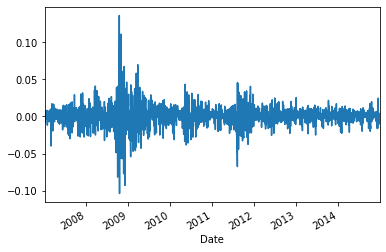

In [46]:

ax = lrets['SPY'].plot()
xlim = ax.set_xlim(lrets['SPY'].index.min(), lrets['SPY'].index.max())

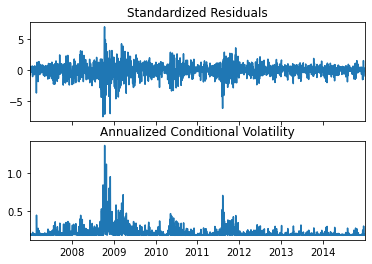

In [47]:
fig = res2.plot(annualize="D")

C:\ProgramData\Anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


<AxesSubplot:xlabel='Date'>

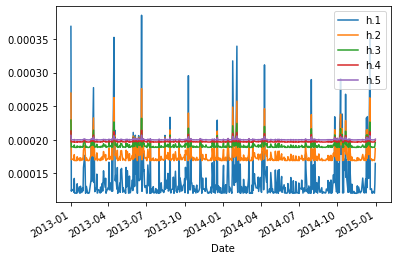

In [52]:
import datetime as dt
split_date = dt.datetime(2013,1,1)
forecasts = res2.forecast(horizon=5, start=split_date)
forecasts.variance[split_date:].plot()

In [53]:
forecasts = res.forecast(horizon=5, start=split_date, method='simulation')

C:\ProgramData\Anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [55]:
print(forecasts.variance.tail())

                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2014-12-24  0.000115  0.000117  0.000119  0.000120  0.000121
2014-12-26  0.000106  0.000108  0.000109  0.000111  0.000112
2014-12-29  0.000097  0.000099  0.000101  0.000104  0.000106
2014-12-30  0.000093  0.000096  0.000098  0.000100  0.000101
2014-12-31  0.000097  0.000100  0.000102  0.000104  0.000105


In [56]:
# https://arch.readthedocs.io/en/latest/univariate/forecasting.html

In [58]:
day = dt.timedelta(12)
print(forecasts.variance[split_date - 5 * day:split_date + 5 * day])

                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2012-11-02       NaN       NaN       NaN       NaN       NaN
2012-11-05       NaN       NaN       NaN       NaN       NaN
2012-11-06       NaN       NaN       NaN       NaN       NaN
2012-11-07       NaN       NaN       NaN       NaN       NaN
2012-11-08       NaN       NaN       NaN       NaN       NaN
...              ...       ...       ...       ...       ...
2013-02-25  0.000107  0.000109  0.000110  0.000112  0.000114
2013-02-26  0.000101  0.000104  0.000105  0.000108  0.000109
2013-02-27  0.000107  0.000108  0.000110  0.000111  0.000113
2013-02-28  0.000099  0.000101  0.000104  0.000105  0.000107
2013-03-01  0.000091  0.000094  0.000097  0.000098  0.000100

[81 rows x 5 columns]


In [59]:
am = arch_model(lrets['SPY'], vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=5)

Iteration:      5,   Func. Count:     64,   Neg. LLF: 19688351245.718277
Optimization terminated successfully    (Exit mode 0)
            Current function value: -6318.734534865167
            Iterations: 10
            Function evaluations: 76
            Gradient evaluations: 6


C:\ProgramData\Anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000195. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [60]:
forecasts = res.forecast(reindex=False)

In [61]:
print(forecasts.mean.iloc[-3:])
print(forecasts.residual_variance.iloc[-3:])
print(forecasts.variance.iloc[-3:])

                 h.1
Date                
2014-12-31  0.000742
                 h.1
Date                
2014-12-31  0.000097
                 h.1
Date                
2014-12-31  0.000097


In [62]:
forecasts = res.forecast(horizon=5, reindex=False)
print(forecasts.residual_variance.iloc[-3:])

                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2014-12-31  0.000097  0.000099  0.000101  0.000103  0.000105


(16072.0, 16435.0)

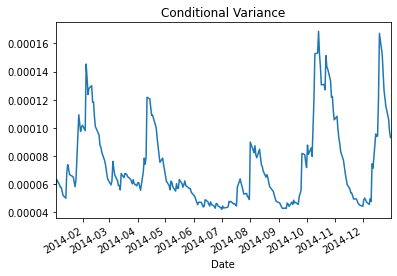

In [65]:
fig, ax = plt.subplots(1, 1)
var_2016 = res.conditional_volatility["2014"] ** 2.0
subplot = var_2016.plot(ax=ax, title="Conditional Variance")
subplot.set_xlim(var_2016.index[0], var_2016.index[-1])